In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

In [ ]:
from pylab import rcParams

In [ ]:
rcParams['figure.figsize'] = 25, 10

In [ ]:
from datetime import datetime

In [ ]:
from pandas.plotting import scatter_matrix

In [ ]:
from sklearn.preprocessing import normalize

In [2]:
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_csv("startup_funding.csv")

In [ ]:
df = df.drop(['SNo','Remarks','SubVertical'],axis = 1)

In [ ]:
df = df.dropna()

In [3]:
df = df.reset_index(drop=True)


In [4]:

for dt in range(0, len(df['Date'])):
    try:
        df['Date'][dt] = datetime.strptime(df['Date'][dt], '%d/%m/%Y').date()
       
    except:
        if dt > 0:
            df['Date'][dt] = df['Date'][dt-1]
        else:
            df['Date'][dt] = df['Date'][dt+1]
df.head()



,Date,StartupName,IndustryVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
0,2017-08-01,TouchKin,Technology,Bangalore,Kae Capital,Private Equity,"1,300,000"
1,2017-08-02,Zepo,Consumer Internet,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000"
2,2017-08-02,Click2Clinic,Consumer Internet,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000"
3,2017-07-01,Billion Loans,Consumer Internet,Bangalore,Reliance Corporate Advisory Services Ltd,Seed Funding,"1,000,000"
4,2017-07-03,Ecolibriumenergy,Technology,Ahmedabad,"Infuse Ventures, JLL",Private Equity,"2,600,000"


In [5]:
df["month"] = [str(dt.month) for dt in df.Date]

In [ ]:
for i in range(0,len(df.AmountInUSD)):
    df.AmountInUSD[i] = int(df.AmountInUSD[i].replace(",",""))

In [6]:
df['Amount_USD'] = list(map(int,df.AmountInUSD))

In [7]:
df = df.drop('AmountInUSD',axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 8 columns):
Date                1385 non-null object
StartupName         1385 non-null object
IndustryVertical    1385 non-null object
CityLocation        1385 non-null object
InvestorsName       1385 non-null object
InvestmentType      1385 non-null object
month               1385 non-null object
Amount_USD          1385 non-null int64
dtypes: int64(1), object(7)
memory usage: 86.7+ KB


In [8]:
count = df['IndustryVertical'].value_counts()
count.head(10)


Consumer Internet       459
Technology              189
eCommerce               113
ECommerce                32
Logistics                16
Education                15
Healthcare               14
Food & Beverage          12
Finance                   7
Online Food Delivery      5
Name: IndustryVertical, dtype: int64

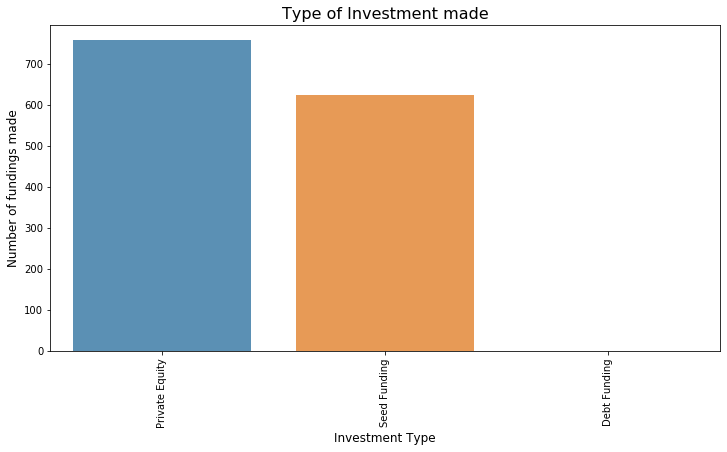

In [9]:
count = df['InvestmentType'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(count.index, count.values, alpha=0.8)
plt.xticks(rotation='vertical')
plt.xlabel('Investment Type', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Type of Investment made", fontsize=16)
plt.show()

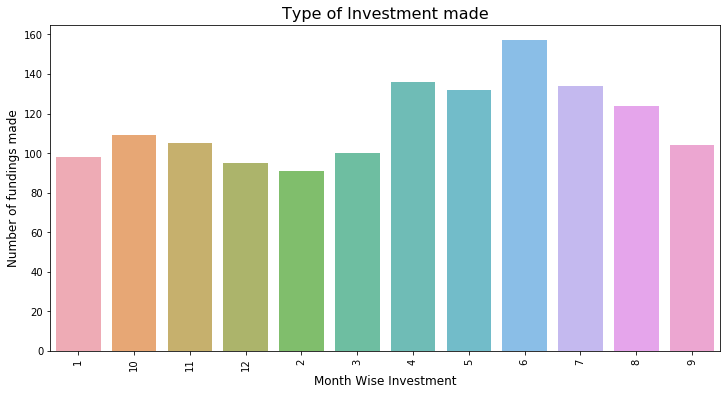

In [10]:
count = df['month'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(count.index, count.values, alpha=0.8)
plt.xticks(rotation='vertical')
plt.xlabel('Month Wise Investment', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Type of Investment made", fontsize=16)
plt.show()

   month  Amount_USD
0      1   953113500
1     10   492409000
2     11  1156952000
3     12   493096000
4      2   626449500
5      3  2573842608
6      4  1966335000
7      5  2448444000
8      6  1065717000
9      7  1982908000
10     8  1600555000
11     9  1710881000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

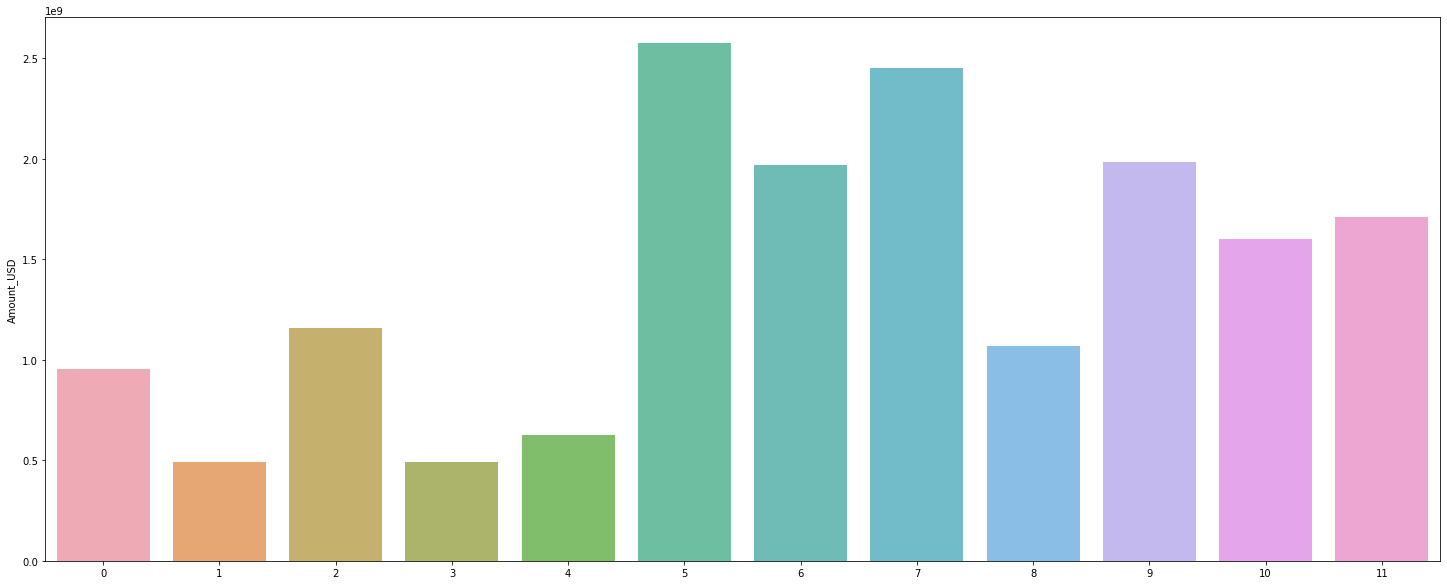

In [11]:

month_mean = df.groupby(['month']).sum().groupby(level=0).mean().reset_index()
print(month_mean)


sns.barplot(month_mean.index, month_mean.Amount_USD, alpha=0.8)
plt.xticks()


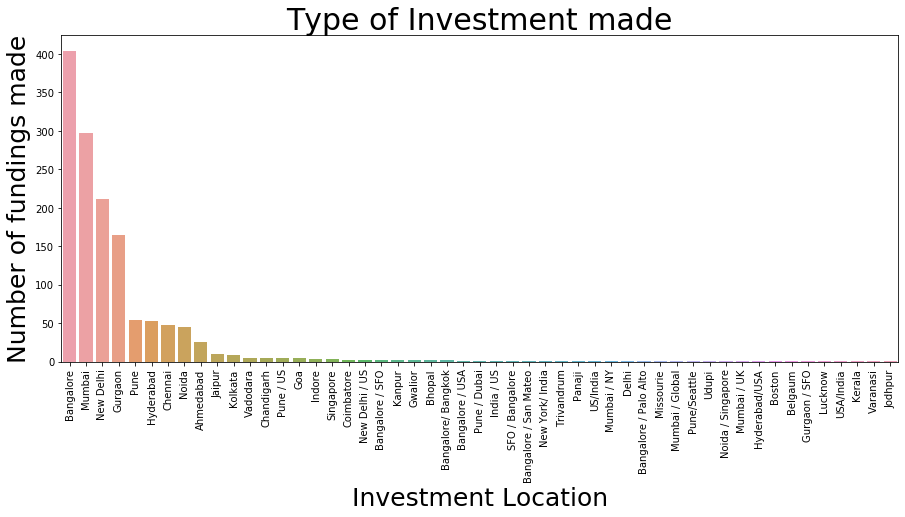

In [12]:
count = df['CityLocation'].value_counts()
plt.figure(figsize=(15,6))
sns.barplot(count.index, count.values, alpha=0.9)
plt.xticks(rotation='vertical')
plt.xlabel('Investment Location', fontsize=25)
plt.ylabel('Number of fundings made', fontsize=25)
plt.title("Type of Investment made", fontsize=30)
plt.show()

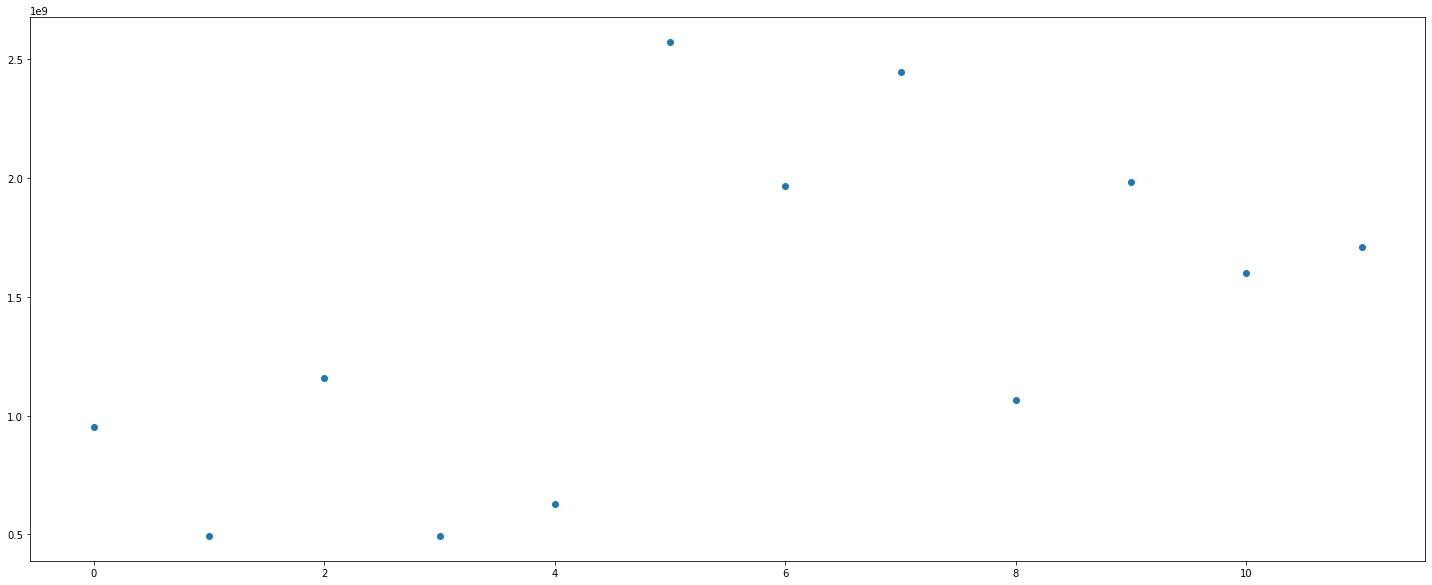

In [13]:
month_mean = df.groupby(['month']).sum().groupby(level=0).mean().reset_index()
plt.scatter(month_mean.index,month_mean.Amount_USD)
plt.show()

In [14]:
df= df.drop('Date',axis = 1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.model_selection import train_test_split

In [15]:
df.head()


,StartupName,IndustryVertical,CityLocation,InvestorsName,InvestmentType,month,Amount_USD
0,TouchKin,Technology,Bangalore,Kae Capital,Private Equity,8,1300000
1,Zepo,Consumer Internet,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,8,500000
2,Click2Clinic,Consumer Internet,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,8,850000
3,Billion Loans,Consumer Internet,Bangalore,Reliance Corporate Advisory Services Ltd,Seed Funding,7,1000000
4,Ecolibriumenergy,Technology,Ahmedabad,"Infuse Ventures, JLL",Private Equity,7,2600000


In [16]:
train,test= train_test_split(df,test_size=0.2,random_state =10)
train_x = train.drop(['Amount_USD'],axis = 1)
train_y = train['Amount_USD']
test_x = test.drop(['Amount_USD'],axis = 1)
test_y = test['Amount_USD']
#print(train_y)


In [17]:
from sklearn.preprocessing import LabelEncoder
le1, le2, le3, le4, le5,le6 = LabelEncoder(), LabelEncoder(), LabelEncoder(), LabelEncoder(), LabelEncoder(), LabelEncoder() 
le1.fit(df.InvestmentType)
le2.fit(df.InvestorsName)
le3.fit(df.IndustryVertical)
le4.fit(df.StartupName)
le5.fit(df.CityLocation)
le6.fit(df.month)
# le1.transform(df.InvestmentType)
# le2.transform(df.InvestorsName)
# le3.transform(df.IndustryVertical)
# le4.transform(df.StartupName)
# le5.transform(df.CityLocation)

LabelEncoder()

In [18]:
train_df = pd.DataFrame(
    {
'InvestmentType': le1.transform(train_x.InvestmentType),
'InvestorsName': le2.transform(train_x.InvestorsName),
'IndustryVertical': le3.transform(train_x.IndustryVertical),
'StartupName': le4.transform(train_x.StartupName),
'CityLocation': le5.transform(train_x.CityLocation),
'month': le6.transform(train_x.month)        
        
    })
test_df=  (pd.DataFrame(
    {
    
'InvestmentType': le1.transform(test_x.InvestmentType),
'InvestorsName': le2.transform(test_x.InvestorsName),
'IndustryVertical': le3.transform(test_x.IndustryVertical),
'StartupName': le4.transform(test_x.StartupName),
'CityLocation': le5.transform(test_x.CityLocation),
'month': le6.transform(test_x.month)         
    }))
test_df.head()

,InvestmentType,InvestorsName,IndustryVertical,StartupName,CityLocation,month
0,1,452,490,635,36,9
1,2,359,63,1207,33,8
2,1,1067,454,1110,1,3
3,1,419,454,486,33,6
4,1,226,172,1049,33,8


In [19]:
clf = GradientBoostingRegressor(learning_rate =0.1,max_depth = 11,min_samples_split =100,min_samples_leaf =20,n_estimators =40,
                               max_features =3,random_state =43)
clf.fit(train_df,train_y)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=11,
                          max_features=3, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=20, min_samples_split=100,
                          min_weight_fraction_leaf=0.0, n_estimators=40,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=43, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [20]:

from sklearn.metrics import mean_squared_error
pred = clf.predict(test_df)
RMSE= np.sqrt(mean_squared_error(test_y,pred))
RMSE 

86516340.75811395

In [24]:
clf1 = RandomForestRegressor(max_features =3,n_estimators = 30,min_samples_leaf =5 ,min_samples_split =50 ,max_depth = 6)
clf1.fit(train_df,train_y)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=50, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [25]:
pred = clf1.predict(test_df)
RMSE = np.sqrt(mean_squared_error(test_y,pred))
RMSE 

86461413.2876652

In [26]:
# parameter2 = {'max_depth':(5,6,7,8 ),'min_samples_split':(50,80,100,120),
#               'min_samples_leaf':(5,10,15,20,25),'max_features':(2,3,4),'n_estimators':(20,30,40,50,100)}
# gsearch2 = GridSearchCV(clf1,parameter2)
# gsearch2.fit(train_df,train_y)
# gsearch2.grid_scores_, gsearch2.best_params_,gsearch2.best_score_

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
clf2 = LinearRegression()
clf2.fit(train_df,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
pred = clf2.predict(test_df)
RMSE = np.sqrt(mean_squared_error(test_y,pred))
RMSE 

87116462.18291081

In [30]:
train_scale =normalize(train_df)
test_scale = normalize(test_df)
optimizer = SGDRegressor()
optimizer.fit(train_scale,train_y)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [31]:
pred = optimizer.predict(test_scale)
optimizer.score(test_scale,test_y)
RMSE = np.sqrt(mean_squared_error(test_y,pred))
RMSE 

87668390.40154606